In [6]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

import math
import numpy as np
import torch as t
import torch.utils.data as tdata
import matplotlib.pyplot as plt
from einops import rearrange

from dots.training import *
from dots.trainhooks import *
from dots.models import MLP
from dots.dots import *
from dots.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
device = get_device()
print(device)

cpu


In [9]:
def get_model(wandb_run_name):
    return t.load(f"../models/{wandb_run_name}.pt")

In [10]:
good_relu = get_model("mild-sweep-3")

In [11]:
good_relu

MLP(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [13]:
list(good_relu.parameters())

[Parameter containing:
 tensor([[-0.1923],
         [ 0.4593],
         [-0.7197],
         [-0.3387],
         [-0.7292],
         [-0.0743],
         [ 0.2783],
         [-0.9279],
         [-1.4241],
         [-0.2442]], requires_grad=True),
 Parameter containing:
 tensor([-2.7413e-01,  4.5852e-01,  7.1943e-01,  3.3860e-01, -7.8919e-01,
         -2.0376e-01,  3.7681e-01,  9.2642e-01, -2.6128e-06, -5.7862e-01],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.0909,  0.6332, -0.4842, -0.1158,  0.0303,  0.0342, -0.0055, -0.3481,
           0.7022, -0.1073]], requires_grad=True),
 Parameter containing:
 tensor([0.4218], requires_grad=True)]

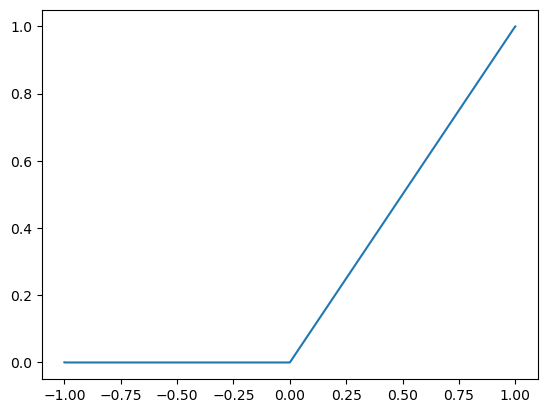

In [12]:
plot_1d_fn(good_relu, -1, 1, 1000)